In [1]:
%load_ext autotime
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import rc
import daft

rc("font", family="serif", size=12)
rc("text", usetex=True)

# Colors.
p_color = {"ec": "#46a546"}
s_color = {"ec": "#f89406"}

time: 343 ms (started: 2021-01-30 15:49:14 +08:00)


<IPython.core.display.Javascript object>

### Example

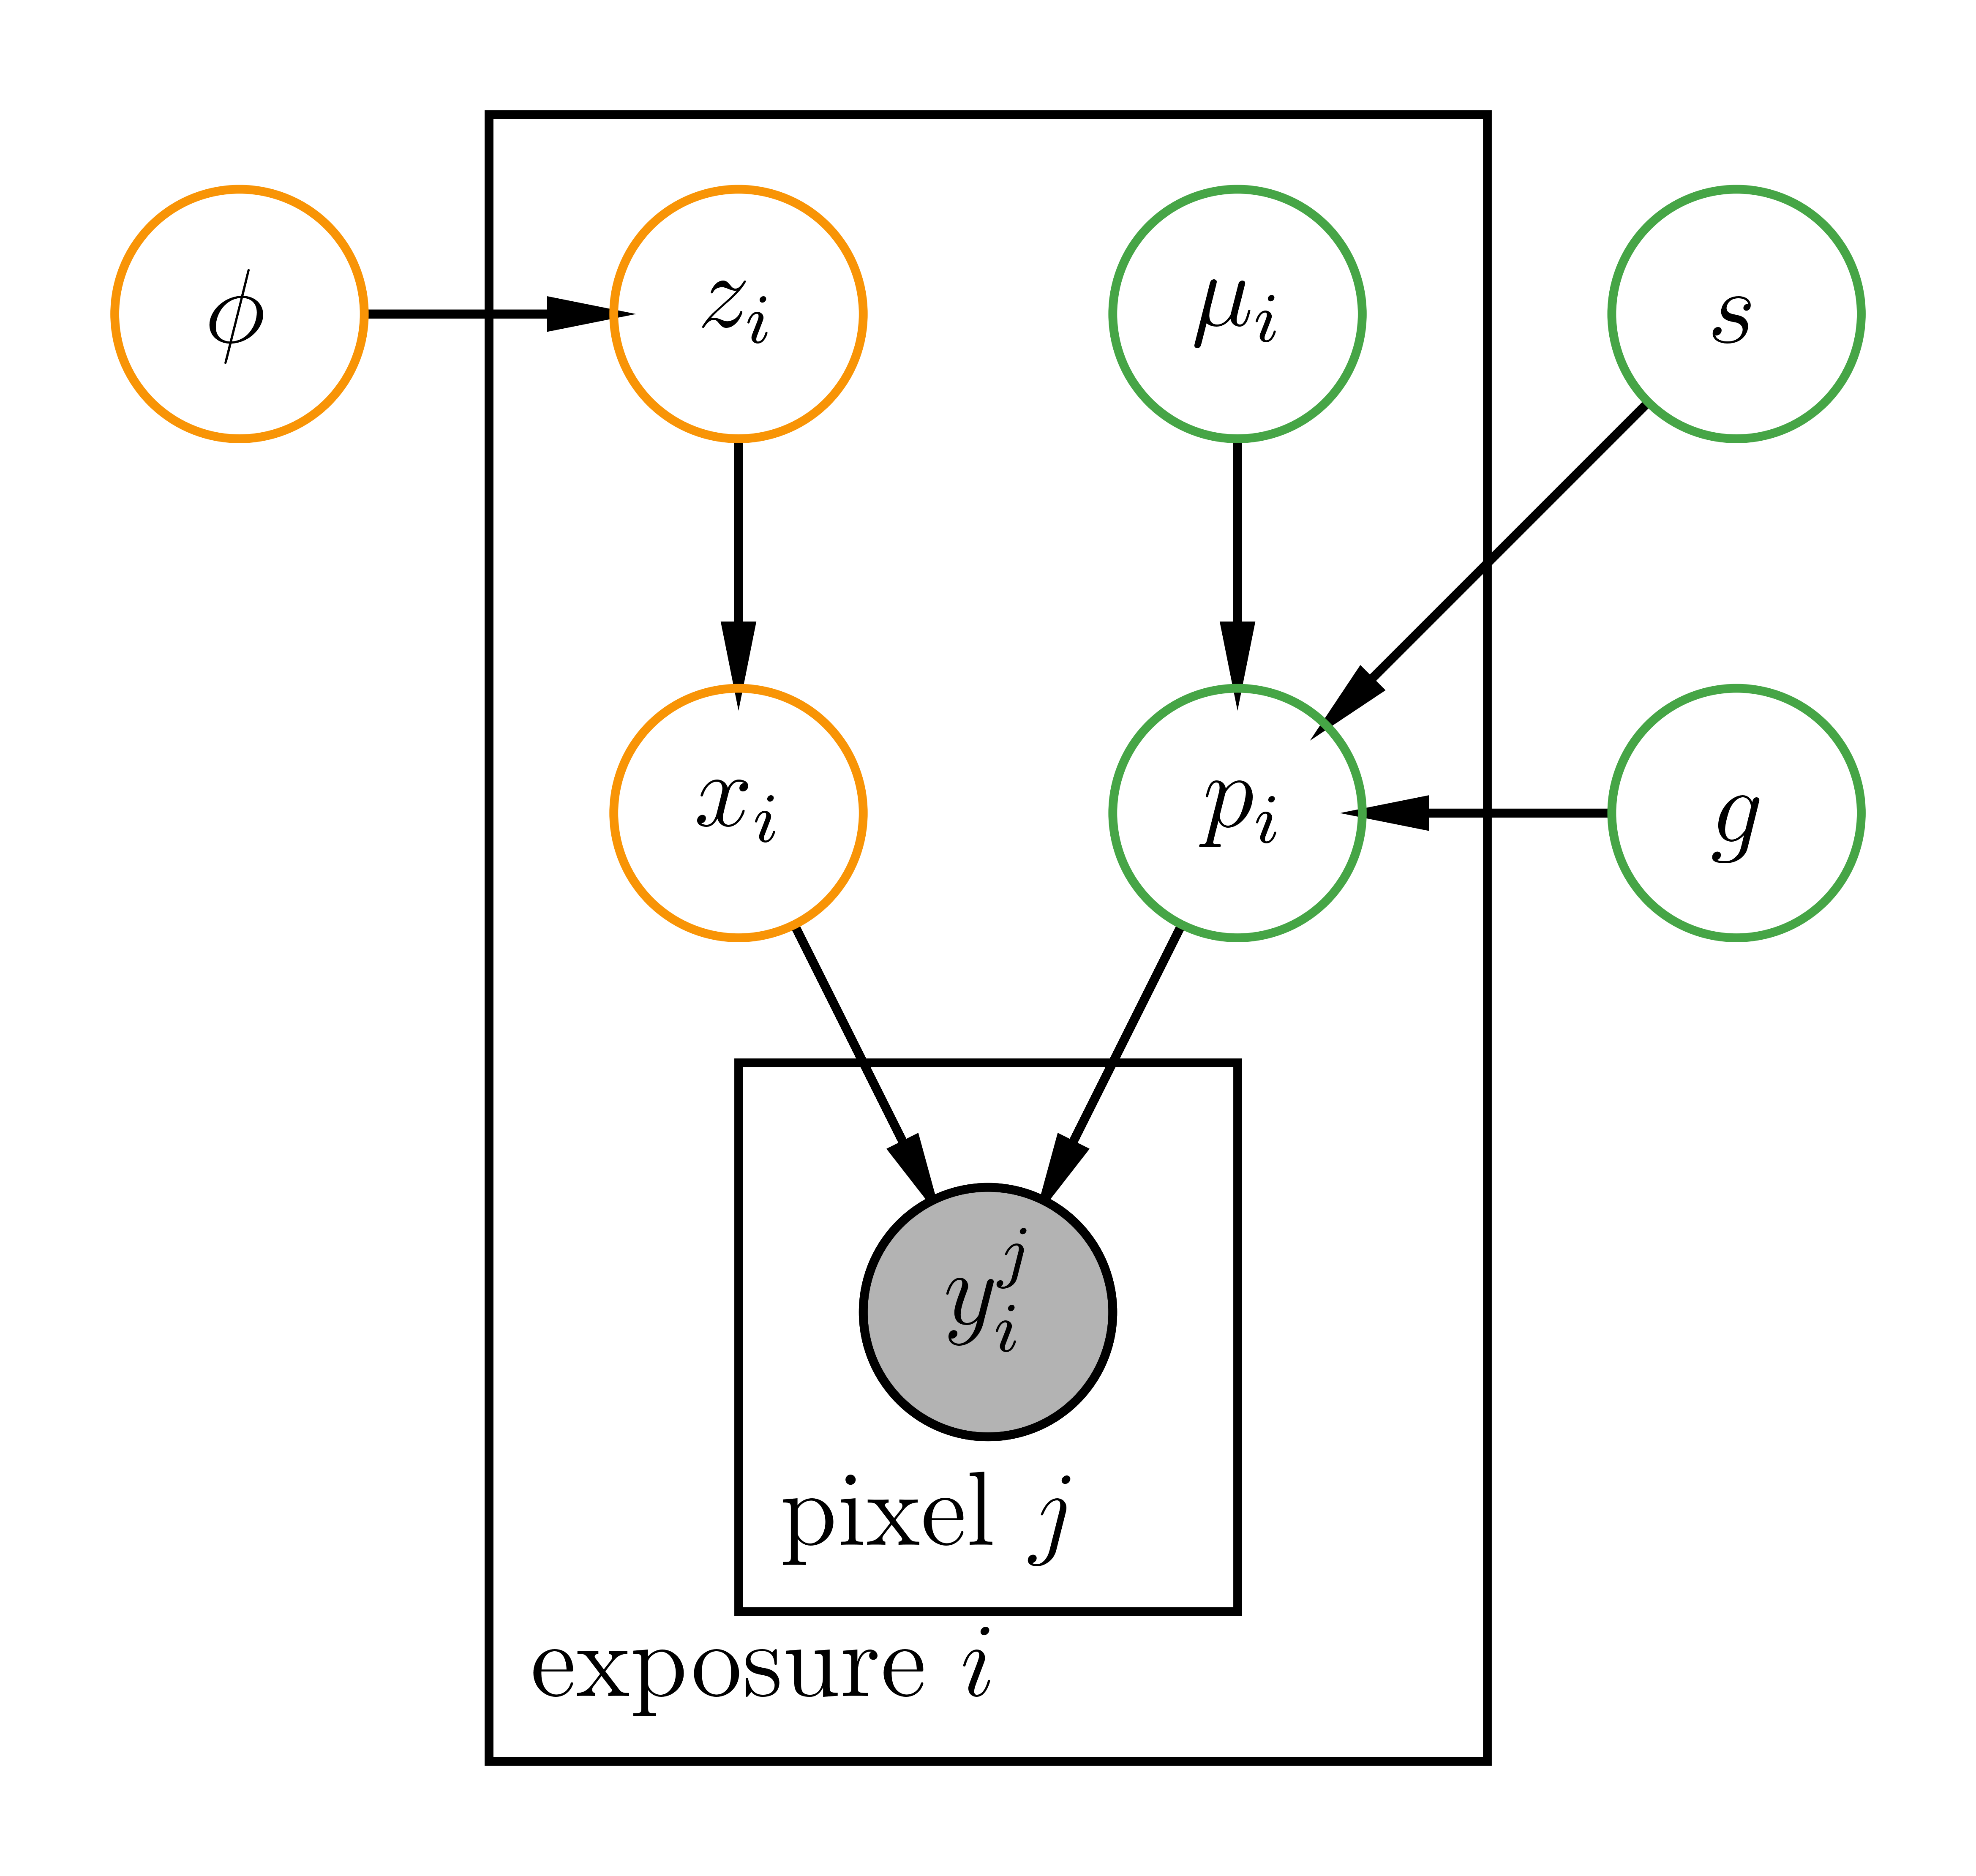

time: 3.07 s (started: 2021-01-30 15:49:28 +08:00)


<IPython.core.display.Javascript object>

In [3]:
pgm = daft.PGM()

n = daft.Node("phi", r"$\phi$", 1, 3, plot_params=s_color)
n.va = "baseline"
pgm.add_node(n)
pgm.add_node("speckle_coeff", r"$z_i$", 2, 3, plot_params=s_color)
pgm.add_node("speckle_img", r"$x_i$", 2, 2, plot_params=s_color)

pgm.add_node("spec", r"$s$", 4, 3, plot_params=p_color)
pgm.add_node("shape", r"$g$", 4, 2, plot_params=p_color)
pgm.add_node("planet_pos", r"$\mu_i$", 3, 3, plot_params=p_color)
pgm.add_node("planet_img", r"$p_i$", 3, 2, plot_params=p_color)

pgm.add_node("pixels", r"$y_i ^j$", 2.5, 1, observed=True)

# Edges.
pgm.add_edge("phi", "speckle_coeff")
pgm.add_edge("speckle_coeff", "speckle_img")
pgm.add_edge("speckle_img", "pixels")

pgm.add_edge("spec", "planet_img")
pgm.add_edge("shape", "planet_img")
pgm.add_edge("planet_pos", "planet_img")
pgm.add_edge("planet_img", "pixels")

# And a plate.
pgm.add_plate([1.5, 0.2, 2, 3.2], label=r"exposure $i$", shift=-0.1)
pgm.add_plate([2, 0.5, 1, 1], label=r"pixel $j$", shift=-0.1)

# Render and save.
pgm.render(dpi=1500)

### Gaussian Mixture Model

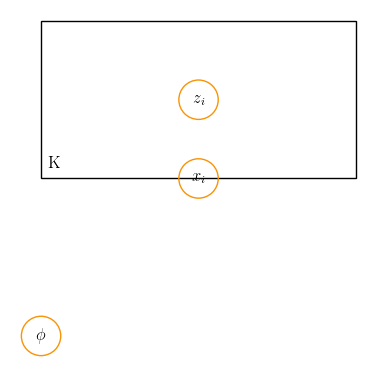

time: 80.6 ms (started: 2021-01-30 16:00:16 +08:00)


<IPython.core.display.Javascript object>

In [37]:
gmm = daft.PGM()
n = daft.Node("phi", r"$\phi$", 0, 0, plot_params=s_color)
n.va = "baseline"
gmm.add_node(n)
gmm.add_node("speckle_coeff", r"$z_i$", 2, 3, plot_params=s_color)
gmm.add_node("speckle_img", r"$x_i$", 2, 2, plot_params=s_color)

# pgm.add_node("spec", r"$s$", 4, 3, plot_params=p_color)
# pgm.add_node("shape", r"$g$", 4, 2, plot_params=p_color)
# pgm.add_node("planet_pos", r"$\mu_i$", 3, 3, plot_params=p_color)
# pgm.add_node("planet_img", r"$p_i$", 3, 2, plot_params=p_color)

# pgm.add_node("pixels", r"$y_i ^j$", 2.5, 1, observed=True)

# # Edges.
# pgm.add_edge("phi", "speckle_coeff")
# pgm.add_edge("speckle_coeff", "speckle_img")
# pgm.add_edge("speckle_img", "pixels")

# pgm.add_edge("spec", "planet_img")
# pgm.add_edge("shape", "planet_img")
# pgm.add_edge("planet_pos", "planet_img")
# pgm.add_edge("planet_img", "pixels")

# # And a plate.
gmm.add_plate([0, 2, 4, 2], label=r"$\rm K$")
# pgm.add_plate([2, 0.5, 1, 1], label=r"pixel $j$", shift=-0.1)

# Render and save.
gmm.render(dpi=100)